Reference:http://nbviewer.jupyter.org/github/cs109/content/blob/master/labs/lab3/lab3full.ipynb

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/Users/yuchengtsai/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
!/Users/yuchengtsai/anaconda/bin/pip install brewer2mpl

In [5]:
import brewer2mpl
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_cmap = brewer2mpl.get_map('Dark2', 'Qualitative', 7)
dark2_colors = dark2_cmap.mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

/Users/yuchengtsai/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [7]:
pd.set_option('display.width',500)
pd.set_option('display.max_columns',100)

## 1. Loading and Cleaning
Let's load the olive oil dataset into a pandas dataframe and have a look at the first 5 rows.

In [21]:
df=pd.read_csv("olive.csv")
df.head(5)

,Unnamed: 0,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


Rename the first column

In [22]:
print df.columns
df.rename(columns={df.columns[0]:'areastring'},inplace=True)
df.columns

Index([u'Unnamed: 0', u'region', u'area', u'palmitic', u'palmitoleic', u'stearic', u'oleic', u'linoleic', u'linolenic', u'arachidic', u'eicosenoic'], dtype='object')


Index([u'areastring', u'region', u'area', u'palmitic', u'palmitoleic', u'stearic', u'oleic', u'linoleic', u'linolenic', u'arachidic', u'eicosenoic'], dtype='object')

Let's explore. Which unique regions and areas are contained in the dataset?

In [23]:
print 'regins\t',df.region.unique()
print 'areas\t',df.area.unique()

regins	[1 2 3]
areas	[1 2 3 4 5 6 9 7 8]


Let's create a crosstabulation or contigency table of the factors

In [24]:
pd.crosstab(df.area,df.region)

region,1,2,3
area,,,
1,25,0,0
2,56,0,0
3,206,0,0
4,36,0,0
5,0,65,0
6,0,33,0
7,0,0,50
8,0,0,50
9,0,0,51


Let's get rid of junk numbering in df.areastring.

In [25]:
df.areastring=df.areastring.map(lambda x:x.split('.')[-1])
df.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,North-Apulia,1,1,1051,67,259,7771,672,50,80,46


Creata a new dataframe dfsub by taking the list of acids and using pandas's apply function to divide all values by 100.

In [26]:
acidlist=['palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic']
dfsub=df[acidlist].apply(lambda x: x/100.)
dfsub.head()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


Replace part of the dataframe by this new dataframe.

In [27]:
df[acidlist]=dfsub
df.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


## 2. Matplotlib

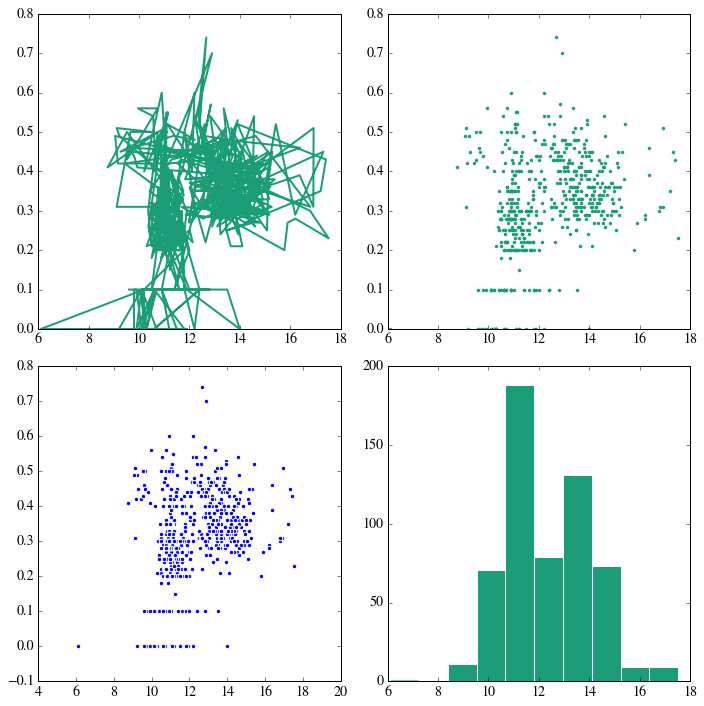

In [28]:
fig, axes = plt.subplots(figsize=(10,10),nrows=2,ncols=2)
axes[0][0].plot(df.palmitic, df.linolenic)
axes[0][1].plot(df.palmitic, df.linolenic, '.')
axes[1][0].scatter(df.palmitic, df.linolenic)
axes[1][1].hist(df.palmitic)
fig.tight_layout()

### Make scatterplots

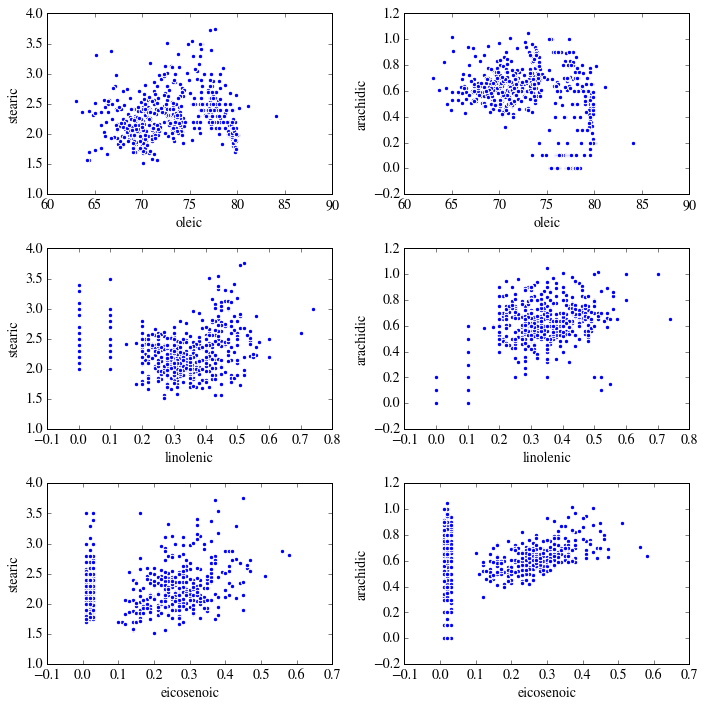

In [29]:
xacids=['oleic','linolenic','eicosenoic']
yacids=['stearic','arachidic']
fig, axes = plt.subplots(figsize=(10,10),nrows=len(xacids),ncols=len(yacids))
for i,xacid in enumerate(xacids):
    for j,yacid in enumerate(yacids):
        axes[i][j].scatter(df[xacid],df[yacid])
        axes[i][j].set_xlabel(xacid)
        axes[i][j].set_ylabel(yacid)
fig.tight_layout()        

## 3. Pandas Data Munging

In [32]:
region_groupby=df.groupby('region')
print type(region_groupby)
region_groupby.head()

<class 'pandas.core.groupby.DataFrameGroupBy'>


,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46
323,Inland-Sardinia,2,5,11.29,1.20,2.22,72.72,11.12,0.43,0.98,0.02
324,Inland-Sardinia,2,5,10.42,1.35,2.10,73.76,11.16,0.35,0.90,0.03
325,Inland-Sardinia,2,5,11.03,0.96,2.10,73.80,10.85,0.32,0.94,0.03
326,Inland-Sardinia,2,5,11.18,0.97,2.21,72.79,11.54,0.35,0.94,0.02
327,Inland-Sardinia,2,5,10.52,0.95,2.15,73.88,11.26,0.31,0.92,0.01


The function groupby gives a dictionary-like object, with the keys being the values of the factor, and the values being the corresponding subsets of the dataframe.

In [31]:
for key, value in region_groupby:
    print "(key,type(value))=(",key,',',type(value),")"
    v=value
v.head()

(key,type(value))=( 1 , <class 'pandas.core.frame.DataFrame'> )
(key,type(value))=( 2 , <class 'pandas.core.frame.DataFrame'> )
(key,type(value))=( 3 , <class 'pandas.core.frame.DataFrame'> )


,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
421,Umbria,3,9,10.85,0.70,1.80,79.55,6.05,0.20,0.50,0.01
422,Umbria,3,9,10.85,0.70,1.85,79.55,6.00,0.25,0.55,0.01
423,Umbria,3,9,10.90,0.60,1.90,79.50,6.00,0.28,0.47,0.02
424,Umbria,3,9,10.80,0.65,1.89,79.60,6.02,0.35,0.20,0.01
425,Umbria,3,9,10.90,0.60,1.95,79.55,6.00,0.28,0.42,0.02


The groupby function also acts like an object that can be **mapped**. After the mapping is complete, the rows are put together (**reduced**) into a larger dataframe. For example, using the describe function.

In [33]:
dfrd=region_groupby.describe()
print type(dfrd)
dfrd.head(20)

<class 'pandas.core.frame.DataFrame'>


region        area    palmitic  palmitoleic     stearic       oleic    linoleic   linolenic   arachidic  eicosenoic
region                                                                                                                           
1      count   323.0  323.000000  323.000000   323.000000  323.000000  323.000000  323.000000  323.000000  323.000000  323.000000
       mean      1.0    2.783282   13.322879     1.548019    2.287740   71.000093   10.334985    0.380650    0.631176    0.273220
       std       0.0    0.741054    1.529349     0.507237    0.398709    3.451431    2.106730    0.079727    0.111644    0.083915
       min       1.0    1.000000    8.750000     0.350000    1.520000   63.000000    4.480000    0.200000    0.320000    0.100000
       25%       1.0    2.500000   12.680000     1.215000    2.015000   68.830000    8.555000    0.320000    0.560000    0.220000
       50%       1.0    3.000000   13.460000     1.630000    2.230000   70.300000   10.900000    0.370000    0.620000    0.270000
       75%       1.0    3.000000   14.190000     1.850000    2.495000   72.835000   12.025000    0.440000    0.690000    0.320000
       max       1.0    4.000000   17.530000     2.800000    3.750000   81.130000   14.620000    0.740000    1.020000    0.580000
2      count    98.0   98.000000   98.000000    98.000000   98.000000   98.000000   98.000000   98.000000   98.000000   98.000000
       mean      2.0    5.336735   11.113469     0.967449    2.261837   72.680204   11.965306    0.270918    0.731735    0.019388
       std       0.0    0.475023    0.404111     0.138514    0.176363    1.418783    1.072336    0.053844    0.118826    0.007436
       min       2.0    5.000000   10.300000     0.350000    1.990000   68.820000   10.570000    0.150000    0.450000    0.010000
       25%       2.0    5.000000   10.852500     0.882500    2.120000   71.372500   11.122500    0.230000    0.660000    0.010000
       50%       2.0    5.000000   11.075000     0.960000    2.220000   73.255000   11.465000    0.270000    0.720000    0.020000
       75%       2.0    6.000000   11.372500     1.040000    2.395000   73.810000   13.065000    0.300000    0.810000    0.020000
       max       2.0    6.000000   12.130000     1.350000    2.720000   74.390000   14.700000    0.430000    1.050000    0.030000
3      count   151.0  151.000000  151.000000   151.000000  151.000000  151.000000  151.000000  151.000000  151.000000  151.000000
       mean      3.0    8.006623   10.948013     0.837351    2.308013   77.930530    7.270331    0.217881    0.375762    0.019735
       std       0.0    0.820542    0.825635     0.264388    0.389560    1.648155    1.431226    0.168865    0.293586    0.007298
       min       3.0    7.000000    6.100000     0.150000    1.700000   73.400000    5.100000    0.000000    0.000000    0.010000

So, one may iterate through the groupby dictionary, get the pandas series from each sub-dataframe, and compute the standard deviation using the std function.

In [34]:
vecs=[]
keys=[]
for key, value in region_groupby:
    k=key
    v=value.std()
print k, type(v),v

3 <class 'pandas.core.series.Series'> region         0.000000
area           0.820542
palmitic       0.825635
palmitoleic    0.264388
stearic        0.389560
oleic          1.648155
linoleic       1.431226
linolenic      0.168865
arachidic      0.293586
eicosenoic     0.007298
dtype: float64


Or one might let pandas take care of concatenating the series obtained by running std on each dataframe back into a dataframe for us.

In [35]:
dfbystd=df.groupby('region').std()
dfbystd.head()

,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,
1,0.741054,1.529349,0.507237,0.398709,3.451431,2.106730,0.079727,0.111644,0.083915
2,0.475023,0.404111,0.138514,0.176363,1.418783,1.072336,0.053844,0.118826,0.007436
3,0.820542,0.825635,0.264388,0.389560,1.648155,1.431226,0.168865,0.293586,0.007298


Or one can use aggregate to pass an arbitray function to the sub-dataframe. The function is applied columnwise.

In [36]:
dfbymean=region_groupby.aggregate(np.mean)
dfbymean.head()

,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,
1,2.783282,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,5.336735,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,8.006623,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


Or one can use apply to passs an arbitrary function to the sub-dataframe. This one takes the dataframe as argument.

In [37]:
region_groupby.apply(lambda f:f.mean())

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,,
1,1.0,2.783282,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,2.0,5.336735,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,3.0,8.006623,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


In [39]:
region_groupby.apply(lambda f: f.palmitic.mean())

region
1    13.322879
2    11.113469
3    10.948013
dtype: float64

In [40]:
# Rename the columns in dfbymean and dfbystd
renamedict_std={k:k+'_std' for k in acidlist}
renamedict_mean={k:k+'_mean' for k in acidlist}
dfbystd.rename(inplace=True,columns=renamedict_std)
dfbymean.rename(inplace=True,columns=renamedict_mean)
dfbystd.head()

,area,palmitic_std,palmitoleic_std,stearic_std,oleic_std,linoleic_std,linolenic_std,arachidic_std,eicosenoic_std
region,,,,,,,,,
1,0.741054,1.529349,0.507237,0.398709,3.451431,2.106730,0.079727,0.111644,0.083915
2,0.475023,0.404111,0.138514,0.176363,1.418783,1.072336,0.053844,0.118826,0.007436
3,0.820542,0.825635,0.264388,0.389560,1.648155,1.431226,0.168865,0.293586,0.007298


In [43]:
# join by common region index
dfpalmiticmean = dfbymean[['palmitic_mean']] 
dfpalmiticstd = dfbystd[['palmitic_std']]
newdfbyregion=dfpalmiticmean.join(dfpalmiticstd)
newdfbyregion.head()

,palmitic_mean,palmitic_std
region,,
1,13.322879,1.529349
2,11.113469,0.404111
3,10.948013,0.825635


Let's weight the palmitic acids content by a random weight. We'll first extract a subset of columns from df and then write a function to weight the palmitic content by this random weight, delivering a weighted palmitic mean in the final dataframe.

In [44]:
df.shape

(572, 11)

In [45]:
weights=np.random.uniform(size=df.shape[0])
smallerdf=df[['palmitic']]
otherdf=df[['region']]
otherdf['weight']=weights
otherdf.head()

/Users/yuchengtsai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,region,weight
0,1,0.327681
1,1,0.549614
2,1,0.350679
3,1,0.135327
4,1,0.613030


In [48]:
#join smallerdf and otherdf on the index, into smallerdf
smallerdf=smallerdf.join(otherdf)
smallerdf.head()

,palmitic,region,weight
0,10.75,1,0.327681
1,10.88,1,0.549614
2,9.11,1,0.350679
3,9.66,1,0.135327
4,10.51,1,0.613030


In [50]:
# Calculate the weighted average over the palmitic column
def wfunc(f):
    return (f.palmitic*f.weight).sum()/f.weight.sum()
smallerdf.groupby('region').apply(wfunc)

region
1    13.344140
2    11.116598
3    10.937109
dtype: float64

In [52]:
# Aggregate the column percentages by summing them up over the regions
def myfunc(column):
    return np.sum(column)
region_groupby.aggregate(myfunc)

,areastring,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,,
1,North-ApuliaNorth-ApuliaNorth-ApuliaNorth-Apul...,899,4303.29,500.01,738.94,22933.03,3338.20,122.95,203.87,88.25
2,Inland-SardiniaInland-SardiniaInland-SardiniaI...,523,1089.12,94.81,221.66,7122.66,1172.60,26.55,71.71,1.90
3,UmbriaUmbriaUmbriaUmbriaUmbriaUmbriaUmbriaUmbr...,1209,1653.15,126.44,348.51,11767.51,1097.82,32.90,56.74,2.98


### One Dimensional Exploratory Data Analysis (EDA( with Pandas

In [53]:
rkeys=[1,2,3]
rvals=['South','Sardinia','North']
rmap={e[0]:e[1] for e in zip(rkeys,rvals)}
rmap

{1: 'South', 2: 'Sardinia', 3: 'North'}

Let's get the dataframe with just the acids.

In [54]:
mdf2=df.groupby('region').aggregate(np.mean)
mdf2=mdf2[acidlist]
mdf2.head()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,
1,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


(0, 100)

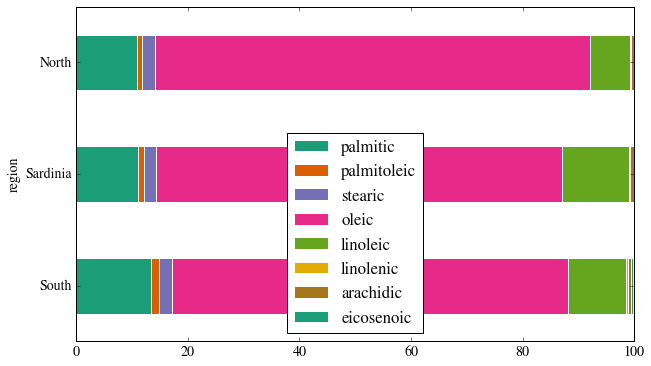

In [57]:
# Make a bar plot of the relative mean percentage of the acids in pandas.
ax =mdf2.plot(kind='barh',stacked=True)
ax.set_yticklabels(rvals)
ax.set_xlim([0,100])

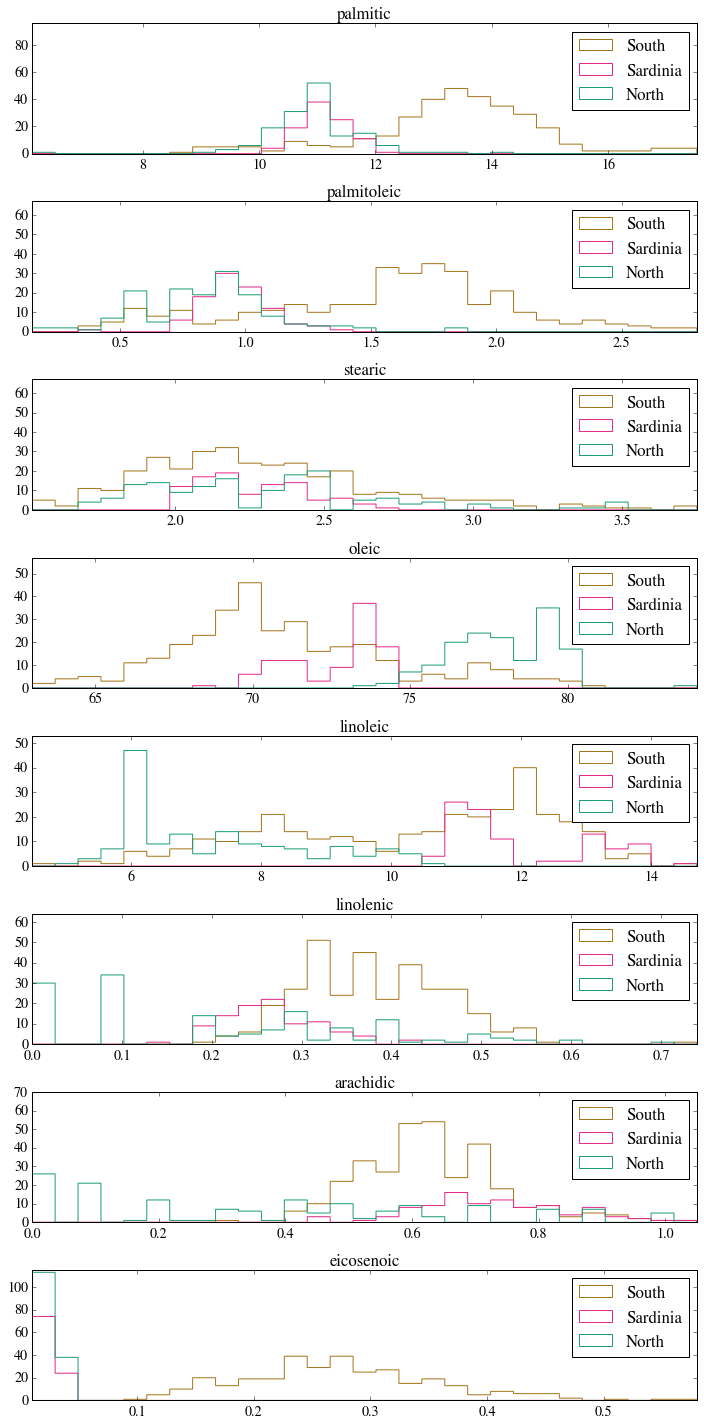

In [61]:
# For each acid, what's the distribution of regions?
fig, axes = plt.subplots(figsize=(10,20),nrows=len(acidlist),ncols=1)
i=0
colors=[dark2_cmap.mpl_colormap(col) for col in [1.0,0.5,0.0]]
for ax in axes.flatten():
    acid=acidlist[i]
    seriesacid=df[acid] #get the Pandas series
    minmax=[seriesacid.min(),seriesacid.max()]
    counts=[]
    nbins=30
    histbinslist=np.linspace(minmax[0],minmax[1],nbins)
    counts=-np.diff([seriesacid[seriesacid>x].count() for x in histbinslist]).min()
    for k,g in df.groupby('region'):
        style={'histtype':'step','color':colors[k-1],'alpha':1.0,'bins':histbinslist,'label':rmap[k]}
        ax.hist(g[acid],**style)
        ax.set_xlim(minmax)
        ax.set_title(acid)
        ax.grid(False)
    #construct legend
    ax.set_ylim([0,counts])
    ax.legend()
    i=i+1
fig.tight_layout()

In [63]:
mask = (df.eicosenoic<0.05)
mask

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
542     True
543     True
544     True
545     True
546     True
547     True
548     True
549     True
550     True
551     True
552     True
553     True
554     True
555     True
556     True
557     True
558     True
559     True
560     True
561     True
562     True
563     True
564     True
565     True
566     True
567     True
568     True
569     True
570     True
571     True
Name: eicosenoic, dtype: bool

In [64]:
np.sum(mask),np.mean(mask)

(249, 0.43531468531468531)

In [65]:
loweico=df[df.eicosenoic<0.02]
pd.crosstab(loweico.area,loweico.region)

region,2,3
area,,
5,19,0
6,11,0
7,0,17
8,0,11
9,0,14


You can see that oleic dominates, and doesnot let us see much about the other acids. Remove it and let's draw bar plots again.

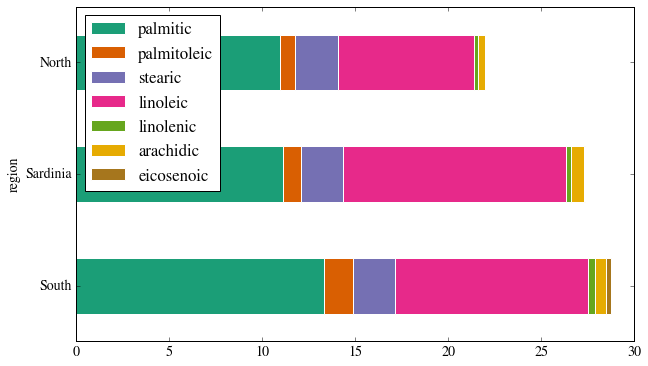

In [66]:
acidlistminusoleic=['palmitic', 'palmitoleic', 'stearic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic']
ax=region_groupby.aggregate(np.mean)[acidlistminusoleic].plot(kind='barh',stacked=True)
ax.set_yticklabels(rvals)